# Loading Data and Building Indexes

In [1]:
!pip install ir_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.5/311.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.3/113.3 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyautocorpus: filename=pyautocorpus-0.1.9-cp310-cp310-linux_x86_64.whl size=189740 sha256=7b18a751e2555d0e5db329dc14b8e957686d77cdc1ec44bda26323de7a6b6b2a
  Stored in directory: /root/.cache/pip/wheels/e2/be/43/ec1e16468c393f6e474e3be6ec6f17fad2216c088328348630
  Created wheel for warc3-wet-clueweb09: filename=warc3_wet_clueweb09-0.2.5-py3-none-any.whl size=18918 sha256=0613f6e89b82171098108775961040e8f9918f53051feef44ff941bf8aaaf234
  Stored in directory: /root/.cache/pi

In [2]:
import re
import nltk
import string
import ir_datasets
import pandas as pd

In [3]:
test_dataset = ir_datasets.load('antique/test')
train_dataset = ir_datasets.load('antique/train')
dataset = ir_datasets.load('antique')

In [4]:
docs_df = pd.DataFrame(dataset.docs_iter())
test_df = pd.DataFrame(test_dataset.qrels_iter())
train_df = pd.DataFrame(train_dataset.qrels_iter())

[INFO] Please confirm you agree to the authors' data usage agreement found at <https://ciir.cs.umass.edu/downloads/Antique/readme.txt>
[INFO] If you have a local copy of https://ciir.cs.umass.edu/downloads/Antique/antique-collection.txt, you can symlink it here to avoid downloading it again: /root/.ir_datasets/downloads/684f7015aff377062a758e478476aac8
[INFO] [starting] https://ciir.cs.umass.edu/downloads/Antique/antique-collection.txt
[INFO] [finished] https://ciir.cs.umass.edu/downloads/Antique/antique-collection.txt: [00:03] [93.6MB] [28.2MB/s]
[INFO] [starting] https://ciir.cs.umass.edu/downloads/Antique/antique-test.qrel
[INFO] [finished] https://ciir.cs.umass.edu/downloads/Antique/antique-test.qrel: [00:00] [150kB] [2.60MB/s]
[INFO] [starting] https://ciir.cs.umass.edu/downloads/Antique/antique-train.qrel
[INFO] [finished] https://ciir.cs.umass.edu/downloads/Antique/antique-train.qrel: [00:00] [626kB] [7.08MB/s]


## docs

In [5]:
print(dataset.docs_cls()._fields)
print(dataset.docs_count())
docs_df = pd.DataFrame(dataset.docs_iter())
docs_df =  docs_df.set_index('doc_id')
print(docs_df.columns)
print(docs_df.shape)
print(docs_df.head())
# select by index
docs_df.loc['2020338_0'].text

('doc_id', 'text')
403666
Index(['text'], dtype='object')
(403666, 1)
                                                        text
doc_id                                                      
2020338_0  A small group of politicians believed strongly...
2020338_1             Because there is a lot of oil in Iraq.
2020338_2  It is tempting to say that the US invaded Iraq...
2020338_3  I think Yuval is pretty spot on. It's a provin...
2874684_0  Call an area apiarist.  They should be able to...


"A small group of politicians believed strongly that the fact that Saddam Hussien remained in power after the first Gulf War was a signal of weakness to the rest of the world, one that invited attacks and terrorism. Shortly after taking power with George Bush in 2000 and after the attack on 9/11, they were able to use the terrorist attacks to justify war with Iraq on this basis and exaggerated threats of the development of weapons of mass destruction. The military strength of the U.S. and the brutality of Saddam's regime led them to imagine that the military and political victory would be relatively easy."

## train queries

In [6]:
print(train_dataset.queries_cls()._fields)
print(train_dataset.queries_count())
queries_train_df = pd.DataFrame(train_dataset.queries_iter())
queries_train_df =  queries_train_df.set_index('query_id')
print(queries_train_df.columns)
print(queries_train_df.shape)
print(queries_train_df.head())
# select by index
queries_train_df.loc['3097310'].text

('query_id', 'text')
2426


[INFO] [starting] https://ciir.cs.umass.edu/downloads/Antique/antique-train-queries.txt
[INFO] [finished] https://ciir.cs.umass.edu/downloads/Antique/antique-train-queries.txt: [00:00] [137kB] [2.65MB/s]
                                                                                                 

Index(['text'], dtype='object')
(2426, 1)
                                                       text
query_id                                                   
3097310   What causes severe swelling and pain in the kn...
3910705   why don't they put parachutes underneath airpl...
237390                  how to clean alloy cylinder heads ?
2247892                           how do i get them whiter?
1078492                     What is Cloud 9 and 7th Heaven?


'What causes severe swelling and pain in the knees?'

## train qrels

In [7]:
print(train_dataset.qrels_cls()._fields)
print(train_dataset.qrels_count())
qrels_train_df = pd.DataFrame(train_dataset.qrels_iter())
qrels_train_df =  qrels_train_df.set_index(['query_id','doc_id'])
print(qrels_train_df.columns)
print(qrels_train_df.shape)
print(qrels_train_df.head())
# select by index ['query_id','doc_id']
qrels_train_df.loc[('2531329','2531329_0')].relevance

('query_id', 'doc_id', 'relevance', 'iteration')
27422
Index(['relevance', 'iteration'], dtype='object')
(27422, 2)
                    relevance iteration
query_id doc_id                        
2531329  2531329_0          4        U0
         2531329_5          4        Q0
         2531329_4          3        Q0
         2531329_7          3        Q0
         2531329_6          3        Q0


4

## test queries

In [8]:
print(test_dataset.queries_cls()._fields)
print(test_dataset.queries_count())
queries_test_df = pd.DataFrame(test_dataset.queries_iter())
queries_test_df =  queries_test_df.set_index('query_id')
print(queries_test_df.columns)
print(queries_test_df.shape)
print(queries_test_df.head())
# select by index
queries_test_df.loc['3990512'].text

('query_id', 'text')
200


[INFO] [starting] https://ciir.cs.umass.edu/downloads/Antique/antique-test-queries.txt
[INFO] [finished] https://ciir.cs.umass.edu/downloads/Antique/antique-test-queries.txt: [00:00] [11.4kB] [4.06MB/s]
                                                                                                 

Index(['text'], dtype='object')
(200, 1)
                                                       text
query_id                                                   
3990512           how can we get concentration onsomething?
714612    Why doesn't the water fall off  earth if it's ...
2528767   How do I determine the charge of the iron ion ...
821387       I have mice.How do I get rid of them humanely?
1880028   What does "see Leaflet" mean on Ept Pregnancy ...


'how can we get concentration onsomething?'

## test qrels

In [9]:
print(test_dataset.qrels_cls()._fields)
print(test_dataset.qrels_count())
qrels_test_df = pd.DataFrame(test_dataset.qrels_iter())
qrels_test_df =  qrels_test_df.set_index(['query_id','doc_id'])
print(qrels_test_df.columns)
print(qrels_test_df.shape)
print(qrels_test_df.head())
# select by index ['query_id','doc_id']
qrels_test_df.loc[('1964316','1964316_5')].relevance

('query_id', 'doc_id', 'relevance', 'iteration')
6589
Index(['relevance', 'iteration'], dtype='object')
(6589, 2)
                     relevance iteration
query_id doc_id                         
1964316  1964316_5           4        U0
         1674088_11          1        Q0
         1218838_13          2        Q0
         1519022_15          2        Q0
         3059341_5           2        Q0


4

## Building Inverse Indexis

In [22]:
Indexs_list = [i.split(" ") for i in list(docs_df.text)]
Indexs = []
for lis in Indexs_list:
  Indexs += lis
Indexs = set(Indexs)

670219

In [26]:
Cols = list(docs_df.index)

In [ ]:
iid = pd.DataFrame(columns=Cols, index=list(Indexs))

In [ ]:
def index_in_doc(index, doc_id):
  if index in docs_df.loc['2020338_0'].text.split(" "):
    return 1
  return 0

for index in list(iid.index):
  for doc_id in list[iid.columns][1:]:
    queries_train_df.loc[index, doc_id] = index_in_doc(index, doc_id)


## Export Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ir_datasets
import pandas as pd
# read datasets
test_dataset = ir_datasets.load('antique/test')
train_dataset = ir_datasets.load('antique/train')
dataset = ir_datasets.load('antique')
# qurels
pd.DataFrame(train_dataset.qrels_iter()).to_csv('/content/drive/My Drive/antique_qrels_train.csv')
pd.DataFrame(test_dataset.qrels_iter()).to_csv('/content/drive/My Drive/antique_qrels_test.csv')
pd.concat([pd.DataFrame(test_dataset.qrels_iter()),pd.DataFrame(train_dataset.qrels_iter())]).to_csv('/content/drive/My Drive/antique_qrels.csv')
# docs
pd.DataFrame(dataset.docs_iter()).to_csv('/content/drive/My Drive/antique_docs.csv')
# queries
pd.DataFrame(train_dataset.queries_iter()).to_csv('/content/drive/My Drive/antique_queries_train.csv')
pd.DataFrame(test_dataset.queries_iter()).to_csv('/content/drive/My Drive/antique_queries_test.csv')
pd.concat([pd.DataFrame(test_dataset.queries_iter()),pd.DataFrame(train_dataset.queries_iter())]).to_csv('/content/drive/My Drive/antique_queries.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data preprocessing

## manually

### Punctuation Removal

In [ ]:
punc_list = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
print(punc_list)
def remove_puctuation(text):
  return re.sub("["+"".join(punc_list)+"]","",text)

print(docs_df.text[0])
print(remove_puctuation(docs_df.text[0]))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
A small group of politicians believed strongly that the fact that Saddam Hussien remained in power after the first Gulf War was a signal of weakness to the rest of the world, one that invited attacks and terrorism. Shortly after taking power with George Bush in 2000 and after the attack on 9/11, they were able to use the terrorist attacks to justify war with Iraq on this basis and exaggerated threats of the development of weapons of mass destruction. The military strength of the U.S. and the brutality of Saddam's regime led them to imagine that the military and political victory would be relatively easy.
A small group of politicians believed strongly that the fact that Saddam Hussien remained in power after the first Gulf War was a signal of weakness to the rest of the world one that invited attacks and terrorism Shortly after taki

### lowercase only

In [ ]:
def lower(text):
  return text.lower()

print(docs_df.text[0])
print(lower(docs_df.text[0]))

A small group of politicians believed strongly that the fact that Saddam Hussien remained in power after the first Gulf War was a signal of weakness to the rest of the world, one that invited attacks and terrorism. Shortly after taking power with George Bush in 2000 and after the attack on 9/11, they were able to use the terrorist attacks to justify war with Iraq on this basis and exaggerated threats of the development of weapons of mass destruction. The military strength of the U.S. and the brutality of Saddam's regime led them to imagine that the military and political victory would be relatively easy.
a small group of politicians believed strongly that the fact that saddam hussien remained in power after the first gulf war was a signal of weakness to the rest of the world, one that invited attacks and terrorism. shortly after taking power with george bush in 2000 and after the attack on 9/11, they were able to use the terrorist attacks to justify war with iraq on this basis and exag


### acronyms

In [ ]:
# search for acronyms
acronyms = []
for i in range(len(docs_df["text"])):
  for word in docs_df["text"][i].lower().split(" "):
    if len(word)<=5:
      acronyms.append(word)
acronyms = set(acronyms)
print(acronyms)

{'', 'way)', '3:4)', 'anm', 'ps2!', "bb's.", 'gpc', 'byway', 'iec', 'quo', 'hot),', '1825,', 'desk*', 'ok<', 'ellen', ':f', '–why', 'calm,', 'yoda', '0.5g', 'buzz.', 'ever"', 'tuna"', 'djed,', 'acct#', 'rref.', 'irr', 'heca?', 'furr', 'sh!ts', 'undo', 'core!', 'boise', 'nile', 'evry', '48.', 'to(if', 'spf', 'ól.', '100ml', 'x/3', 'be..?', '244;', 'knds', '1700.', 'whack', 'j.lo', 'anoun', '..use', 'h=3.', 'svhs,', 'i*', 'rbi..', '3v', 'stys', '200,', 'such"', '(m.)', 'spicy', 'chane', 'fell,', 'okay-', '13.3', 'maxim', 'zion.', 'soupy', '401k', '2.16', '10pts', 'it"!', "1'st", 'herte', 'say?', 'rl', '0.02', '..god', 'shity', 'age,i', 'dave!', 'ours"', 'havae', 'cpu', 'skid)', '万里长城;', 'npo', 'voodo', 'cams.', 'time}', '3.27.', 'knit', 'kelp,', 'olof', 'is--', 'muni', 'do;)', 'tie!', 'one?,', ';l', 'gob..', '(sri', 'mok,', 'b/day', 'war', 'keg', 'prada', "-'til", '(red)', 'egg’s', '161', 'nest"', 'bick', '8.997', '!?', 'ants,', 'ech', 'rpg,', 'cabs!', 'hush.', '9:22', '5,219', "4'11", '

In [ ]:
acronyms = {
    "u.s": "united states",
    "u.s.a": "united states",
    "u.n": "united nations",
    "i.e": "example",
    "e.g.": "for example",
    "m.p": "member of the house of lords",
    "ibm": "International Business Machines Corporation",
    "tss": "Time Sharing System",
}

In [ ]:
def replace_acronyms(text, acronyms_dict=acronyms):
  tmp = text
  for word in text.split(' '):
    if word in acronyms_dict.keys():
      tmp = tmp.replace(word, acronyms_dict[word])
  return tmp

replace_acronyms('u.s military')

'united states military'

### remove common words

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
en_sw = stopwords.words("english")
print(en_sw)

def remove_stop_words(text, sw = en_sw):
  ls = []
  for word in text.split(' '):
    if(word != '' and word.lower() not in en_sw):
       ls.append(word)
  return ' '.join(ls)

print(docs_df.text[0])
print(remove_stop_words(docs_df.text[0]))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### lematization

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

def lemmatize(text):
  return ' '.join([lemmatizer.lemmatize(i) for i in text.split(' ')])

print(docs_df.text[0])
print(lemmatize(docs_df.text[0]))

[nltk_data] Downloading package wordnet to /root/nltk_data...


A small group of politicians believed strongly that the fact that Saddam Hussien remained in power after the first Gulf War was a signal of weakness to the rest of the world, one that invited attacks and terrorism. Shortly after taking power with George Bush in 2000 and after the attack on 9/11, they were able to use the terrorist attacks to justify war with Iraq on this basis and exaggerated threats of the development of weapons of mass destruction. The military strength of the U.S. and the brutality of Saddam's regime led them to imagine that the military and political victory would be relatively easy.
A small group of politician believed strongly that the fact that Saddam Hussien remained in power after the first Gulf War wa a signal of weakness to the rest of the world, one that invited attack and terrorism. Shortly after taking power with George Bush in 2000 and after the attack on 9/11, they were able to use the terrorist attack to justify war with Iraq on this basis and exaggera

### stemming

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem(text):
  return ' '.join([stemmer.stem(i) for i in text.split(' ')])

print(docs_df.text[0])
print(stem(docs_df.text[0]))

A small group of politicians believed strongly that the fact that Saddam Hussien remained in power after the first Gulf War was a signal of weakness to the rest of the world, one that invited attacks and terrorism. Shortly after taking power with George Bush in 2000 and after the attack on 9/11, they were able to use the terrorist attacks to justify war with Iraq on this basis and exaggerated threats of the development of weapons of mass destruction. The military strength of the U.S. and the brutality of Saddam's regime led them to imagine that the military and political victory would be relatively easy.
a small group of politician believ strongli that the fact that saddam hussien remain in power after the first gulf war wa a signal of weak to the rest of the world, one that invit attack and terrorism. shortli after take power with georg bush in 2000 and after the attack on 9/11, they were abl to use the terrorist attack to justifi war with iraq on thi basi and exagger threat of the de

### preprocessor

In [ ]:
def preprocess(text_df, remove_puctuation_=True, lower_=True, replace_acronyms_=True, acronyms_dict=acronyms, remove_stop_words_=True, lemmatize_=True, stem_=True):
  # df is the text column to be preprocessed
  if(type(text_df)==type(pd.DataFrame())):
    if remove_puctuation_: text_df = text_df.apply(lambda x: remove_puctuation(x))
    if lower_: text_df = text_df.apply(lambda x: lower(x))
    if replace_acronyms_: text_df = text_df.apply(lambda x: replace_acronyms(x, acronyms_dict))
    if remove_stop_words_: text_df = text_df.apply(lambda x: remove_stop_words(x))
    if lemmatize_: text_df = text_df.apply(lambda x: lemmatize(x))
    if stem_: text_df = text_df.apply(lambda x: stem(x))
  if(type(text_df)==type(str())):
    if remove_puctuation_: text_df = remove_puctuation(text_df)
    if lower_: text_df = lower(text_df)
    if replace_acronyms_: text_df = replace_acronyms(text_df, acronyms_dict)
    if remove_stop_words_: text_df = remove_stop_words(text_df)
    if lemmatize_: text_df = lemmatize(text_df)
    if stem_: text_df = stem(text_df)
  return text_df

In [ ]:
pp_df = docs_df.copy()
pp_df.text = preprocess(pp_df.text)
pp_df.text[0]

"A small group of politicians believed strongly that the fact that Saddam Hussien remained in power after the first Gulf War was a signal of weakness to the rest of the world, one that invited attacks and terrorism. Shortly after taking power with George Bush in 2000 and after the attack on 9/11, they were able to use the terrorist attacks to justify war with Iraq on this basis and exaggerated threats of the development of weapons of mass destruction. The military strength of the U.S. and the brutality of Saddam's regime led them to imagine that the military and political victory would be relatively easy."

### lemmatize - stem

whatever comes first, the same result

In [ ]:

print('[original]: ',docs_df.text[0])
print('[lemm]: ', lemmatize(docs_df.text[0]))
print('[stem]: ', stem(docs_df.text[0]))
print('[lemm -> stem]: ',stem(lemmatize(docs_df.text[0])))
print('[stem -> lemm]: ',lemmatize(stem(docs_df.text[0])))

[original]:  A small group of politicians believed strongly that the fact that Saddam Hussien remained in power after the first Gulf War was a signal of weakness to the rest of the world, one that invited attacks and terrorism. Shortly after taking power with George Bush in 2000 and after the attack on 9/11, they were able to use the terrorist attacks to justify war with Iraq on this basis and exaggerated threats of the development of weapons of mass destruction. The military strength of the U.S. and the brutality of Saddam's regime led them to imagine that the military and political victory would be relatively easy.
[lemm]:  A small group of politician believed strongly that the fact that Saddam Hussien remained in power after the first Gulf War wa a signal of weakness to the rest of the world, one that invited attack and terrorism. Shortly after taking power with George Bush in 2000 and after the attack on 9/11, they were able to use the terrorist attack to justify war with Iraq on t

# Data Representation using TF-IDF

## manually

for test and train qrels

### TF
Term Frequency: TF of a term or word is the number of times the term appears in a document compared to the total number of words in the document.

In [ ]:
# applying on test set
df = queries_train_df.copy()
df.text = preprocess(df.text)

In [ ]:
def getTermSet(df, textColName):
  termSet=[]
  for text in df[textColName]:
    termSet += text.split(' ')
  return set(sorted(termSet))

In [ ]:
termVector = getTermSet(df, 'text')
print(len(termVector))

3855


In [ ]:
tf_df = df.copy()
for term in termVector:
  tf_df[term] = 0

def calculate_tf(df, textColName, termVector):
  for i in df.index:
    l = len(doc)
    if(l == 0): continue
    for term in doc.split(' '):
      if term in df.columns:
        df.loc[i, term] = doc.loc[i,textColName].count(term)/l
  return df
tf_df = calculate_tf(tf_df, 'text', termVector)

Streaming output truncated to the last 5000 lines.
<ipython-input-81-b9421497e700>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_df[term] = 0
<ipython-input-81-b9421497e700>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_df[term] = 0
<ipython-input-81-b9421497e700>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

NameError: ignored

In [ ]:
df.index

Index(['3097310', '3910705', '237390', '2247892', '1078492', '782453',
       '3198658', '1907320', '10895', '992730',
       ...
       '296095', '157747', '4234146', '902402', '4207498', '3963399',
       '1493026', '4413372', '2210131', '4086230'],
      dtype='object', name='query_id', length=2426)

In [ ]:
tf_df.head()

,text,,aircraft,liabil,phlegm,thin,pig,unhealthili,choic,lunar,...,reject,mazada,ador,attent,roll,assist,1256,chlorat,drip,chicago
query_id,,,,,,,,,,,,,,,,,,,,,
3097310,caus sever swell pain knee,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3910705,dont put parachut underneath airplan seat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237390,clean alloy cylind head,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2247892,get whiter,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1078492,cloud 9 7th heaven,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### idf

Inverse Data Frequency (IDF)
The log of the number of documents divided by the number of documents that contain the word

In [ ]:
idf = tf_df.copy()
print(idf.tail())
def termExist(tf):
  if float(tf) != 0: return 1
  return 0

import math
def calculate_idf(tf_df, termVector):
  N = tf_df.shape[0]
  print(tf_df.shape)
  if N == 0: return
  # set all non vales in terms to 1 if its not zero to sum them
  for i in tf_df.index:
    for term in termVector:
        if term in tf_df.columns:
          tf_df.loc[i, term]=termExist(tf_df.loc[i, term])
        #  print(tf_df[term])
  # calculate total
  tf_df.loc['idf'] = tf_df.sum(numeric_only=True)
  print('next')
  print(tf_df.tail())
  # log(N/count+1)
  for term in termVector:
      tf_df.loc['idf', term]=math.log(N/(tf_df.loc['idf', term]+1))
  print('next')
  print(tf_df.tail())
  tf_df = tf_df.loc['idf',list(termVector)]
  print(tf_df.loc['idf'])
  return tf_df

idf = calculate_idf(idf, termVector)
idf

                                text     aircraft  liabil  phlegm  thin  pig  \
query_id                                                                       
3963399         make root beer float  0         0       0       0     0    0   
1493026                duck much fat  0         0       0       0     0    0   
4413372                      r idiot  0         0       0       0     0    0   
2210131   muslim massevangel nowaday  0         0       0       0     0    0   
4086230                see lost voic  0         0       0       0     0    0   

          unhealthili  choic  lunar  ...  reject  mazada  ador  attent  roll  \
query_id                             ...                                       
3963399             0      0      0  ...       0       0     0       0     0   
1493026             0      0      0  ...       0       0     0       0     0   
4413372             0      0      0  ...       0       0     0       0     0   
2210131             0      0      0  ..

### TF-IDF

TF-IDF is simply the TF multiplied by IDF.

In [ ]:
tf_idf_df = tf_df
def calculate_tf_idf(tf_df, idf, termVector):
  for term in termVector:
    for i in tf_df.index:
      tf_df.loc[i, term] = tf_df.loc[i, term]*idf[term]

  return tf_df

tf_idf_df = calculate_tf_idf(tf_idf_df, idf, termVector)
tf_idf_df.head()

## Using Sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import math
vectorizer = TfidfVectorizer(min_df=1, stop_words="english")
def cosine_sim(query, text):
    tfidf = vectorizer.fit_transform([text, query])
    return ((tfidf * tfidf.T).A)[0,1]

def rlevance_cos_angle(cos):
  if cos > 1 or cos < 0: 
    return -1
  if cos <= 1 - math.cos(math.pi/4):
    return 1
  elif cos <= 1 - math.cos(math.pi/2):
    return 2
  elif cos <= 1 - math.cos(3*math.pi/4):
    return 3
  else:
    return 4

def rlevance_cos_value(cos):
  if cos > 1 or cos < 0: 
    return -1
  if cos <= 0.25:
    return 1
  elif cos <= 0.5:
    return 2
  elif cos <= 0.75:
    return 3
  else:
    return 4

### similarity of query and document

In [ ]:
# get the first query and text and relevance
i = 0
# index (query_id, doc_id)
print(qrels_test_df.index[i])
# query
query = queries_test_df.loc[qrels_test_df.index[i][0]].text
query = preprocess(query)
print(query)
# doc
doc = docs_df.loc[qrels_test_df.index[i][1]].text
doc = preprocess(doc)
print(doc)
# relevance
print("Relevance:", qrels_test_df.loc[qrels_test_df.index[i]].relevance)
print("cos_sim:", cosine_sim(doc, query))
print("cos_sim predection by angle:", rlevance_cos_angle(cosine_sim(doc, query)))
print("cos_sim predection by value:", rlevance_cos_value(cosine_sim(doc, query)))

('1964316', '1964316_5')
mean weed
weed could mean bad thing grow ur graden back front yard could mean drug
Relevance: 4
cos_sim: 0.48889089026526167
cos_sim predection by angle: 2
cos_sim predection by value: 2


## Predit:

for whole test qrel dataset

In [ ]:
relevance_predict = [["(query_id, doc_id)", "relevance", "predict"]]
print(qrels_test_df.shape[0])
for i in range(qrels_test_df.shape[0]):
  query_id = qrels_test_df.index[i][0]
  doc_id = qrels_test_df.index[i][1]
  query = queries_test_df.loc[query_id].text
  query = preprocess(query)
  doc = docs_df.loc[doc_id].text
  doc = preprocess(doc)
  relevance = qrels_test_df.loc[qrels_test_df.index[i]].relevance
  predict =  rlevance_cos_value(cosine_sim(doc, query))
  relevance_predict.append([(query_id, doc_id), relevance, predict])

print(relevance_predict[5])

6589
[('1964316', '3059341_5'), 2, 3]


In [ ]:
relevance_predict[:10]

[['(query_id, doc_id)', 'relevance', 'predict'],
 [('1964316', '1964316_5'), 4, 2],
 [('1964316', '1674088_11'), 1, 2],
 [('1964316', '1218838_13'), 2, 3],
 [('1964316', '1519022_15'), 2, 2],
 [('1964316', '3059341_5'), 2, 3],
 [('1964316', '4126855_1'), 2, 2],
 [('1964316', '2434719_9'), 2, 2],
 [('1964316', '3786452_1'), 2, 2],
 [('1964316', '1964316_3'), 4, 1]]

# Training Models

It is required?

## Building training and testing models

In [ ]:
# the data most be preprocssed

## Logisitc Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.5, random_state=45)
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
lr_score = lr.score(X_test_vec, y_test)
print("Results for Logistic Regression with tfidf")
print(lr_score)
y_pred_lr = lr.predict(X_test_vec)
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print(tn, fp, fn, tp)
tpr_knn = round(tp/(tp + fn), 4)
tnr_knn = round(tn/(tn+fp), 4)
print(tpr_knn, tnr_knn)

## Support vector Machine

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.5, random_state=55)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
from sklearn import svm
#params = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100]}
svcl = svm.SVC(kernel = 'rbf')
#clf_sv = GridSearchCV(svcl, params)
svcl.fit(X_train_vec, y_train)
svcl_score = svcl.score(X_test_vec, y_test)
print("Results for Support Vector Machine with tfidf")
print(svcl_score)
y_pred_sv = svcl.predict(X_test_vec)
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm_sv = confusion_matrix(y_test, y_pred_sv)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sv).ravel()
print(tn, fp, fn, tp)
tpr_sv = round(tp/(tp + fn), 4)
tnr_sv = round(tn/(tn+fp), 4)
print(tpr_sv, tnr_sv)

## K Nearest Neighbour

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.5, random_state=65)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)
knn_score = knn.score(X_test_vec, y_test)
print("Results for KNN Classifier with tfidf")
print(knn_score)
y_pred_knn = knn.predict(X_test_vec)
#Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
print(tn, fp, fn, tp)
tpr_knn = round(tp/(tp + fn), 4)
tnr_knn = round(tn/(tn+fp), 4)
print(tpr_knn, tnr_knn)

# Evaluation

## Concepts

precision : Precision is the fraction of true positive examples among the examples that the model classified as positive. In other words, the number of true positives divided by the number of false positives plus true positives.

recall : Recall, also known as sensitivity, is the fraction of examples classified as positive, among the total number of positive examples. In other words, the number of true positives divided by the number of true positives plus false negatives.

tp : The number of true positives classified by the model.

fn : The number of false negatives classified by the model.

fp : The number of false positives classified by the model

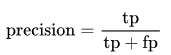

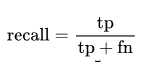

for multi classes

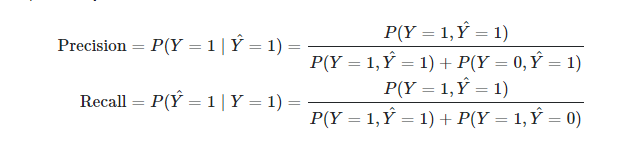

In [ ]:
posibilities = dict()
for predict in relevance_predict[1:]:
  key = (str(predict[1]), str(predict[2]))
  if key in posibilities.keys():
    posibilities[key] = posibilities[key] + 1
  else:
    posibilities[key] = 1

l = len(relevance_predict[1:])
for key in posibilities.keys():
  posibilities[key] = posibilities[key]/l

print("posibilities for predicting 2 while actual val is 4: ", posibilities[('4', '2')])

# each class predict
rel_class_posibilities = dict()
for key in posibilities.keys():
   if key[0] in rel_class_posibilities.keys():
    rel_class_posibilities[key[0]] = rel_class_posibilities[key[0]] + posibilities[key]
   else:
    rel_class_posibilities[key[0]] = posibilities[key]

print("posibilities for relevance class 1: ", rel_class_posibilities["1"])
print("posibilities for relevance class 2: ", rel_class_posibilities["2"])
print("posibilities for relevance class 3: ", rel_class_posibilities["3"])
print("posibilities for relevance class 4: ", rel_class_posibilities["4"])

pre_class_posibilities = dict()
for key in posibilities.keys():
   if key[1] in pre_class_posibilities.keys():
    pre_class_posibilities[key[1]] = pre_class_posibilities[key[1]] + posibilities[key]
   else:
    pre_class_posibilities[key[1]] = posibilities[key]
print("posibilities for predicting class 1: ", pre_class_posibilities["1"])
print("posibilities for predicting class 2: ", pre_class_posibilities["2"])
print("posibilities for predicting class 3: ", pre_class_posibilities["3"])
print("posibilities for predicting class 4: ", pre_class_posibilities["4"])

posibilities for predicting 2 while actual val is 4:  0.0459857337987555
posibilities for relevance class 1:  0.24920321748368496
posibilities for relevance class 2:  0.36682349370162387
posibilities for relevance class 3:  0.18151464562149036
posibilities for relevance class 4:  0.2024586431932008
posibilities for predicting class 1:  0.7230232205190468
posibilities for predicting class 2:  0.2420701168614357
posibilities for predicting class 3:  0.03156776445591137
posibilities for predicting class 4:  0.0033388981636060097


## precision and recall

In [ ]:
precision = posibilities.copy()
recall = posibilities.copy()
for key in precision:
  precision[key] = precision[key] /  rel_class_posibilities[key[1]]
  recall[key] = precision[key] /  pre_class_posibilities[key[1]]

print(precision)
print(recall)

{('4', '2'): 0.12536201903185767, ('1', '2'): 0.15184112536201905, ('2', '3'): 0.0802675585284281, ('2', '2'): 0.28837401737691354, ('4', '1'): 0.6059683313032886, ('4', '3'): 0.030100334448160536, ('3', '1'): 0.5645554202192448, ('2', '1'): 0.981729598051157, ('1', '1'): 0.7490864799025577, ('3', '3'): 0.03177257525083612, ('1', '3'): 0.03177257525083612, ('2', '4'): 0.008995502248875561, ('3', '2'): 0.09433181630119986, ('1', '4'): 0.005247376311844077, ('3', '4'): 0.0022488755622188904}
{('4', '2'): 0.5178748234488466, ('1', '2'): 0.6272609247713753, ('2', '3'): 2.5427064574221765, ('2', '2'): 1.1912830097156637, ('4', '1'): 0.8381035547769458, ('4', '3'): 0.9535149215333162, ('3', '1'): 0.7808261259077675, ('2', '1'): 1.357811990251695, ('1', '1'): 1.036047610427782, ('3', '3'): 1.0064879727296114, ('1', '3'): 1.0064879727296114, ('2', '4'): 2.694152923538231, ('3', '2'): 0.3896879859615084, ('1', '4'): 1.5715892053973013, ('3', '4'): 0.6735382308845578}


## f1_score

The F-score, also called the F1-score, is a measure of a model’s accuracy on a dataset.

In [ ]:
f1_score = posibilities.copy()
for key in f1_score:
  f1_score[key] = 2 * ((precision[key] * recall[key]) /(precision[key] + recall[key]))

print(f1_score)

{('4', '2'): 0.20185981021527624, ('1', '2'): 0.24449686583830488, ('2', '3'): 0.15562246377631683, ('2', '2'): 0.4643441838945463, ('4', '1'): 0.703378020779947, ('4', '3'): 0.058358423916118805, ('3', '1'): 0.6553079650884531, ('2', '1'): 1.139543084921884, ('1', '1'): 0.86950247794908, ('3', '3'): 0.061600558578125394, ('1', '3'): 0.061600558578125394, ('2', '4'): 0.01793113426647741, ('3', '2'): 0.15189451065703957, ('1', '4'): 0.01045982832211182, ('3', '4'): 0.004482783566619353}


## Mean Average Precision (MAP)

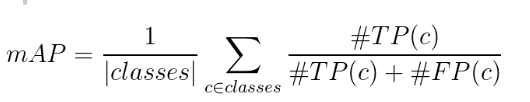

In [ ]:

# each class precision
class_precision = dict()
for key in precision.keys():
   if key[0] in precision.keys():
    class_precision[key[0]] = class_precision[key[0]] + precision[key]
   else:
    class_precision[key[0]] = precision[key]

c = len(class_precision)
for key in class_precision.keys():
  class_precision[key] = class_precision[key] / c
MAP = class_precision
print(MAP)

{'4': 0.007525083612040134, '1': 0.0013118440779610193, '2': 0.0022488755622188904, '3': 0.0005622188905547226}


## Mean Reciprocal Rank (MRR)

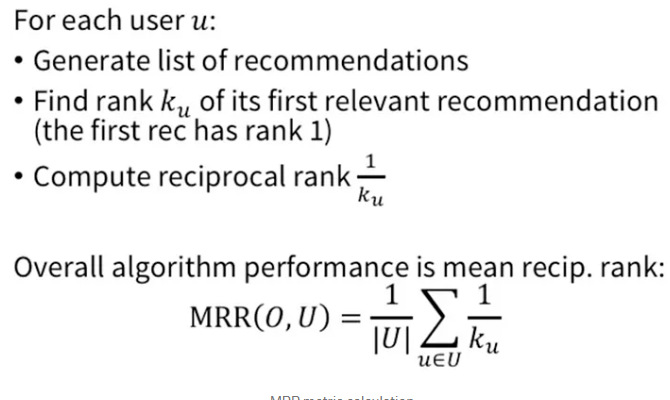

In [ ]:
import pandas as pd

CRK = dict()
for predict in relevance_predict[1:]:
  key = str(predict[0][0])
  if key in CRK.keys():
    CRK[key] = min(CRK[key] , predict[2]) 
  else:
    CRK[key] = predict[2] 

MRR = 0
U = len(CRK)
for key in CRK:
  MRR = MRR + 1/CRK[key]
MRR = MRR/U
print(MRR)

1.0


Another way

In [ ]:
cols = ['query_id', 'doc_id', 'predict']
data = []
for i in range(qrels_test_df.shape[0]):
  query_id = qrels_test_df.index[i][0]
  doc_id = qrels_test_df.index[i][1]
  query = queries_test_df.loc[query_id].text
  query = preprocess(query)
  doc = docs_df.loc[doc_id].text
  doc = preprocess(doc)
  predict =  rlevance_cos_value(cosine_sim(doc, query))
  data.append([query_id, doc_id, predict])

hits = pd.DataFrame(data, columns=cols)
MRR = (1 / hits.groupby('query_id')['predict'].min()).mean()
MRR

1.0

# Get most similar documents for the API

## Help Function

In [ ]:

# def preprocess()

## Initial on server load

In [ ]:
# initialize on server startup
from sklearn.feature_extraction.text import TfidfVectorizer
dataset = ir_datasets.load('antique')
docs_df = pd.DataFrame(dataset.docs_iter())
vectorizer = TfidfVectorizer()
pp_df = docs_df.copy()
pp_df.text = preprocess(pp_df.text)
corpus=list(pp_df.text)
corpus_vectorized = vectorizer.fit_transform(corpus)
# on server just import the pre compiled cropus_vectorized
# import joblib
# filename = 'antique_docs_vectorizer.tfidf'
# joblib.dump(corpus_vectorized, filename)
# corpus_vectorized = joblib.load(filename)

## recommendation process

In [ ]:
def get_recommendations(docs_df, scores_array, start=0, n=10, TextColName="text"):
  # for the API send doc_df as all the dataset
  # for the test make doc_df only the text
  sorted_indices = scores_array.argsort()[::-1]
  start = min(start, len(sorted_indices))
  n = min(start+n, len(sorted_indices))
  docs_id = list()
  for position, idx in enumerate(sorted_indices[start:start+n]):
    """
    row = docs_df.iloc[idx]
    text = row[TextColName]
    score = scores_array[idx]
    print(docs_df.iloc[idx].doc_id)
    print(f"{position + 1} {idx} [score = {score}]: {text}")
    """
    docs_id.append(docs_df.iloc[idx].doc_id)
  return docs_id

# create the vectorize model on the whole dataset

def get_docs(q, docs_df, start=0, n=10, TextColName="text"):
  query = preprocess(text_df=q)
  query_vectorized = vectorizer.transform([query])
  scores = query_vectorized.dot(corpus_vectorized.transpose())
  scores_array = scores.toarray()[0]
  docs_id = get_recommendations(docs_df, scores_array, start, n)
  docs_df =  docs_df.set_index('doc_id')
  docs_df = docs_df.loc[docs_id]
  docs_df = list(docs_df.to_dict().values())
  return docs_df

docs = get_docs(q = "war on iraq", docs_df=docs_df, start=0, n=10, TextColName="text")

## Export docs TF_IDF to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import joblib
filename = '/content/drive/My Drive/antique_docs_vectorizer.tfidf'
joblib.dump(corpus_vectorized, filename)

In [ ]:
# session crash
# https://wisdomml.in/tf-idf-in-nlp-how-to-implement-it-in-4-steps/
# every word with its df_idf value in every doc
# tf_idf_df = pd.DataFrame(corpus_vectorized.toarray(), columns = vectorizer.get_feature_names())
# tf_idf_df.head()